<a href="https://colab.research.google.com/github/BankNatchapol/ML-Algorithm/blob/master/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network**
---
Neural Network เป็นหนึ่งใน algorithm ที่นิยมมากในปัจจุบันเนื่องจากความแม่นยำของมัน และ ยิ่งหลังจากที่มี Backpropagation เกิดขึ้นยิ่งทำให้การใช้งานมันง่ายยิ่งขึ้นเพราะเราไม่ต้องมาปรับ parameter ภายในแต่ละ layer เอง <br>
ซึ่งประโยชน์ของการใช้งาน Neural Network ก็มีมากมายไม่ว่าจะเป็นการประยุกต์ใช้ใน Autonomous Vehicle หรือในการทำ OCR <br><br>
ในครั้งนี้ก็จะเป็นการใช้ Numpy ในการทำ Neural Network จากสมการพื้นฐาน<br>
โดย Architecture ของ Neural Network ที่ผมทำจะเป็น 2 hidden layer <br>
input มี 2 features แบบง่ายๆ <br>
target เป็นค่า 0,1<br>
Architecture จะเป็นดังภาพ
![alt text](https://github.com/BankNatchapol/ML-Algorithm/blob/master/NetworkArch.jpg?raw=true)



In [0]:
import numpy as np
import matplotlib.pyplot as plt

โดยในครั้งนี้จะใช้ Activation function เป็น Sigmoid function แล้วก็สร้าง hypothesis function ออกมา<br><br>
$Sigmoid function$
\begin{equation}
\sigma(z) = \frac{1}{1 + e^{-z}}
\end{equation}
$hypothesis function$ 
<br><br>
\begin{equation}
h_{\theta}(x) = \sigma(\theta^Tx)
\end{equation}<br>
ในส่วนของ Forward propagation คือ การหา hypothesis ของทุกๆ layer โดยจะเขียนแทน hypothesis ของแต่ละชั้นว่า $a^{(l)}_j$  
![alt text](https://github.com/BankNatchapol/ML-Algorithm/blob/master/Forward.jpg?raw=true)
โดยที่ <br>
$l$ คือ ลำดับที่ของ layer<br>
$j$ คือลำดับที่ของ unit

In [0]:
def sigmoid(z): 
  return 1/(1+np.exp(-z))

def hypothesis(theta,X):
  X_1 = np.ones([X.shape[0],X.shape[1]+1])
  X_1[:,1:] = X
  z = np.dot(X_1,theta.T)
  return [sigmoid(z),z]

def forwardProp(theta,X,num_layer):
  A = []
  z = []
  for i in range(num_layer-1):
    [X,Z] = hypothesis(theta[i],X)
    A.append(X)
    z.append(Z)
  return [A,z]

ในขั้นตอนต่อไปจะเป็นการทำ Backpropagation เพื่อหา <br><br>
\begin{equation}
\frac{\partial}{\partial\Theta^{(l)}_{ij}}J(\Theta)
\end{equation}<br>
เพื่อนำไปใช้ใน Optimizer algorithm อื่นๆเช่น Gradient Descent<br>
ซึ่งการทำฺ Backpropagation นั้นมี idea มาจากกฏ Chain rule<br><br>
\begin{equation}
\frac{\partial}{\partial\Theta^{(3)}}J(\Theta) =\color{red}{\frac{\partial J(\Theta)}{\partial a^{(4)}}\frac{\partial a^{(4)}}{\partial z^{(4)}}}\frac{\partial z^{(4)}}{\partial \Theta^{(3)}}
\end{equation}<br>
\begin{equation}
\frac{\partial}{\partial\Theta^{(2)}}J(\Theta) =\color{red}{\frac{\partial J(\Theta)}{\partial a^{(4)}}\frac{\partial a^{(4)}}{\partial z^{(4)}}}\color{green}{\frac{\partial z^{(4)}}{\partial a^{(3)}}\frac{\partial a^{(3)}}{\partial z^{(3)}}}\frac{\partial z^{(3)}}{\partial \Theta^{(2)}}
\end{equation}<br>
\begin{equation}
\frac{\partial}{\partial\Theta^{(1)}}J(\Theta) =\color{red}{\frac{\partial J(\Theta)}{\partial a^{(4)}}\frac{\partial a^{(4)}}{\partial z^{(4)}}}\color{green}{\frac{\partial z^{(4)}}{\partial a^{(3)}}\frac{\partial a^{(3)}}{\partial z^{(3)}}}\color{blue}{\frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial z^{(2)}}}\frac{\partial z^{(2)}}{\partial \Theta^{(1)}}
\end{equation}<br>
โดยที่ <br>
$z^{(l)} = \Theta^{(l-1)T}a^{(l-1)}$<br>
$a^{(l)} = \sigma(z^{(l)}) $
<br><br>
จะเห็นได้ว่าในการหาค่า gradient ของ $\Theta$ ที่มี layer น้อยลงมาเรื่อยๆจะมีการใช้ค่าจากส่วนของ gradient ใน layer ชั้นที่มากกว่า ซึ่งตรงส่วนนี้เราจะแทนสัญลักษณ์ด้วย $\delta$ ซึ่งเมื่อเราทำ partial derivative เราจะได้ผลลัพท์ตามนี้<br><br> 
\begin{equation}
\delta^{(4)}=\frac{\partial}{\partial z^{(4)}}J(\Theta) = a^{(4)} - y
\end{equation}<br>
\begin{equation}
\delta^{(3)}=\frac{\partial}{\partial z^{(3)}}J(\Theta) =\Theta^{(3)T}\delta^{(4)} *\sigma(z^{(3)})(1-\sigma(z^{(3)}))
\end{equation}<br>
\begin{equation}
\delta^{(2)}=\frac{\partial}{\partial z^{(2)}}J(\Theta) =\Theta^{(2)T}\delta^{(3)} *\sigma(z^{(2)})(1-\sigma(z^{(2)}))
\end{equation}<br>
จากสมการ $\delta$ ที่ได้เราจะเห็น pattern ของมันว่าสามารถเขียนเป็นสมการได้ดังนี้<br><br>
เมื่อ $L$ คือ จำนวน layer ทั้งหมด<br><br>
\begin{equation}
\delta^{(L)} = a^{(L)} - y
\end{equation}<br>
\begin{equation}
\delta^{(l)}=\Theta^{(l)T}\delta^{(l+1)} *\sigma(z^{(l)})(1-\sigma(z^{(l)}));\;\; l=2,3,...,L-1
\end{equation}<br><br>


ก็จะได้ค่า $\delta$ ที่รอนำไปใช้ต่อไป


In [0]:
def sigmoidGrad(z):# Sigmoid Gradient Function
  return sigmoid(z)*(1-sigmoid(z))

def sigma(theta,nextSigma,z):
  return np.dot(nextSigma,theta)[:,1:]*sigmoidGrad(z)

def backProp(theta,X,Y,A,z,num_layer):
  sigmas = []
  nextSigma = A[num_layer-2] - Y
  sigmas.insert(0,nextSigma)
  for i in range(num_layer-2,0,-1):
    nextSigma = sigma(theta[i],nextSigma,z[i-1])
    sigmas.insert(0,nextSigma)
  return sigmas

เพิ่ม Regularized term เข้าไปเพื่อปรับค่าในกรณีที่เกิด Overfitting จากสมการ<br><br>
\begin{equation}
Reg = \sum^{L-1}_{l=1}\sum^{S_L}_{j=1}\sum^{S_{L+1}}_{i=1}(\Theta_{ij}^{(l)})^2
\end{equation}<br>
$L$ = จำนวน layer<br>
$S_L$ = จำนวน Unit ใน layer ที่ L

In [0]:
def regularized(theta,X,lamb):
  total = 0
  m = X.shape[0]
  for i in theta:
    total += (lamb/(2*m))*sum(sum(i**2));
  return total

ทำการหา cost function จากสมการ <br><br>
\begin{equation}
J(\Theta) = -\frac{1}{m}[\sum^m_{i=1}\sum^K_{k=1}y_k^{(i)}log(h_\theta(x^{(i)})_k)+(1-y_k^{(i)})log(1-h_\theta(x^{(i)})_k)] + \frac{\lambda}{2m}RegularizedTerm
\end{equation}<br>
K = จำนวน output
<br><br>
ในส่วนของ gradient นั้นถ้าดูจากสมการใน Backpropagation<br><br>
\begin{equation}
\frac{\partial}{\partial\Theta^{(3)}}J(\Theta) =\color{red}{\frac{\partial J(\Theta)}{\partial a^{(4)}}\frac{\partial a^{(4)}}{\partial z^{(4)}}}\frac{\partial z^{(4)}}{\partial \Theta^{(3)}}
\end{equation}<br>
จะเห็นได้ว่าเราสามารถจัดรูปให้อยู่ในรูปของ $\delta$ ที่ได้จากในการทำ Backpropagation ได้<br><br>
\begin{equation}
\frac{\partial}{\partial\Theta^{(3)}}J(\Theta) =\color{red}{\delta^{(4)}}\frac{\partial z^{(4)}}{\partial \Theta^{(3)}}
\end{equation}<br>
หรือสามารถจัดรูปหลังจากการทำ partial differentiate ได้ดังนี้<br><br>
\begin{equation}
\frac{\partial}{\partial\Theta^{(l)}}J(\Theta) =\delta^{(4)}a^{(l)T}
\end{equation}<br><br>

In [0]:
def costGrad(theta,X,Y,num_layer,lamb):
  m = X.shape[0]
  Delta = []
  Theta_grad = []

  [A,z] = forwardProp(theta,X,num_layer)

  sigmas = backProp(theta,X,Y,A,z,num_layer)

  one1 = np.ones([X.shape[0],X.shape[1]+1])
  one1[:,1:] = X

  Reg = regularized(theta,X,lamb)
  J = -(1/m)*sum(sum(Y*np.log(A[-1])+(1-Y)*np.log(1-A[-1])));
  J += Reg

  Delta.append(np.dot(one1.T,sigmas[0]).T)
  for i in range(num_layer-2):
    one2 = np.ones([A[i].shape[0],A[i].shape[1]+1])
    one2[:,1:] = A[i]
    Delta.append(np.dot(one2.T,sigmas[i+1]).T)
  
  for i in range(num_layer-1):
    q = np.zeros(theta[i].shape)
    q[:,1:] = theta[i][:,1:]
    Theta_grad.append((Delta[i]/m) + (lamb/m)*q)

  return [Theta_grad,J]

ในการทำ Neural Network นั้นตัว model ของเราจะมีความซับซ้อนมากเนื่องจากมีการซ้อนกันของ layer หลายชั้น ยิ่งมีจำนวน layer มากจะยิ่งทำให้การตรวจสอบความถูกต้องนั้นยากเข้าไปอีก <br> การที่เราจะลองใช้การพลอตกราฟเพื่อดูว่าค่า cost ในทุกจุดมีค่าที่ลู่ลงตลอดนั้นทำได้ยาก เราจึงใช้วิธีการที่เรียกว่า Gradient Checking ในการตรวจสอบ<br> <br> 
ใช้ครั้งนี้จะใช้ method ที่ชื่อว่า Numerical Estimation ในการทำ Gradient Checking <br><br>
idea ก็คือ ในการหา gradient นั้นจะเป็นการหาความชันระหว่างจุด 2 จุดบน cost function ที่เล็กมากๆ ซึ่งถ้าเราใช้การประมาณค่าความชันด้วยจุด 2 จุดที่ห่างกันน้อยมากๆ แทนการใช้ Gradient ค่าที่ได้ก็ควรจะมีความไกล้เคียงกัน<br>
![alt text](https://github.com/BankNatchapol/ML-Algorithm/blob/master/Checking.jpg?raw=true)
จึงสามารถเขียนสมการเพื่อใช้ทำ Numerical Estimation Gradient Checking ได้ดังนี้<br><br>
\begin{equation}
\frac{\partial}{\partial\Theta^{(l)}_{ij}}J(\Theta) = \frac{J(\Theta+\epsilon)-J(\Theta-\epsilon)}{2\epsilon}
\end{equation}<br><br>
โดยที่ <br>
$\epsilon$ มีค่าน้อยมากๆ<br>
$\epsilon^{(l)}_{ij} = \epsilon\;;\;\; Others\; =\; 0$ <br><br>


In [0]:
def gradientNum(theta,X,Y,num_layer,lamb,epsilon=1e-4):
  matEp = []
  for i in range(len(theta)):
    o = np.zeros([theta[i].shape[0],theta[i].shape[1]])
    r = np.zeros([theta[i].shape[0],theta[i].shape[1]])
    for j in range(len(theta[i])):
      for k in range(len(theta[i][j])):
        o[j,k] = epsilon
        plus = []
        minus = []
        for p in theta:
          plus.append(p.copy())
          minus.append(p.copy())
        
        plus[i] = theta[i] + o
        minus[i] = theta[i] - o
        [_,J1] = costGrad(plus,X,Y,num_layer,lamb)
        [_,J2] = costGrad(minus,X,Y,num_layer,lamb)
        o[j,k] = 0
        r[j,k] = (J1-J2)/(2*epsilon)
    matEp.append(r)
  return matEp

def gradientCheck(theta,X,Y,num_layer,lamb,epsilon=1e-4):
  loss1 = gradientNum(theta,X,Y,num_layer,lamb,epsilon=1e-4)
  loss2 = costGrad(theta_ran,x,y,num_layer,lamb)[0]
  for i in range(len(theta)):
      if sum(sum(loss1[i]-loss2[i]))<epsilon: continue
      return "From gradient chcking your result is fault!!"
  return "From gradient chcking your result is OK!!"

ในการ Optimize ในครั้งนี้จะใช้ Gradient Descent Algorithm ในการทำ

In [0]:
def gradientDescent(theta,X,Y,num_layer,lamb,alpha):
  Jlist = []
  JL = costGrad(theta,X,Y,num_layer,lamb)[1] +1
  while 1:
    [grad, J] = costGrad(theta,X,Y,num_layer,lamb)
    Jlist.append(J)
    if((JL-J)<0.0001): 
      break
    for i in range(num_layer-1):
      theta[i] -= alpha*grad[i] 
    JL = J
  return [theta,Jlist]

โดยอีกประเด็นหนึ่งที่เกิดขึ้นในการ train model ของเราก็คือในการกำหนด initial $\Theta$ <br>
ถ้าเรากำหนด initial $\Theta$ เป็น 0 ทั้งหมด<br>
1. อาจจะทำให้ค่าของ $\Theta$ ติดอยู่ภายใน local minimum ซึ่งจะทำให้ผลลัพท์ไม่ได้ตามค่าที่ต้องการ
2. ถ้าใช้ initial $\Theta$ เป็นค่าเดียวกันในกระบวนการ train รอบแรกๆจะได้ค่า $\Theta$ ที่ซ้ำกันหลายรอบซึ่งถ้าเรามีจำนวน layer ที่เยอะจะทำให้เราเสียเวลามาก

ดังนั้นจึงต้องทำ Random initial $\Theta$

In [0]:
theta_0 = [np.zeros([3,3]),
           np.zeros([3,4]),
           np.zeros([1,4])]

theta_ran = [(6*np.random.rand(3,3)-3),
             (6*np.random.rand(3,4)-3),
             (6*np.random.rand(1,4)-3)]

x = np.array([[4.0,1.0],
              [3.0,4.0],
              [-1.0,-4.0],
              [-3.0,-2.0],
              [-3.0,-1.0]])
y = np.array([[1.0],
              [1.0],
              [0.0],
              [0.0],
              [0.0]])
num_layer = 4
lamb = 0
alpha = 0.01

In [164]:
print(gradientCheck(theta_ran,x,y,num_layer,lamb))
print(gradientCheck(theta_0,x,y,num_layer,lamb))

From gradient chcking your result is OK!!
From gradient chcking your result is fault!!


In [0]:
[Theta_0,J_0] = gradientDescent(theta_0,x,y,num_layer,lamb,alpha)
[Theta_ran,J_ran] = gradientDescent(theta_ran,x,y,num_layer,lamb,alpha)

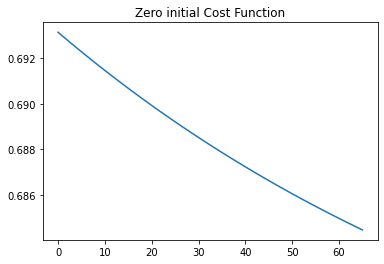

In [166]:
plt.plot(range(len(J_0)),J_0);
plt.title('Zero initial Cost Function');

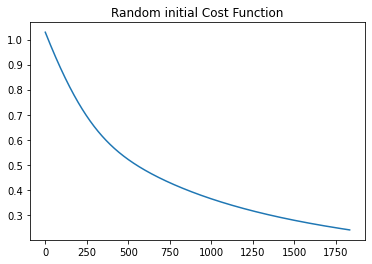

In [167]:
plt.plot(range(len(J_ran)),J_ran);
plt.title('Random initial Cost Function');

Cost สุดท้ายที่ได้

In [168]:
print(f"J_0 = {J_0[-1]}; J_ran = {J_ran[-1]}")

J_0 = 0.6844560955489216; J_ran = 0.2396961037768903


In [0]:
[A1,_] = forwardProp(Theta_0,x,4)
[A2,_] = forwardProp(Theta_ran,x,4)

Zero initial $\Theta$ Prediction

In [170]:
A1[-1]

array([[0.47521813],
       [0.47521813],
       [0.47521813],
       [0.47521813],
       [0.47521813]])

Random initial $\Theta$ Prediction

In [171]:
A2[-1]

array([[0.73163028],
       [0.79237924],
       [0.19277419],
       [0.19319966],
       [0.20104807]])